data science end of year project part 2
Fasion mnist-2 3.8.21

In [1]:
# All imports that I will need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
from sklearn.model_selection import cross_val_score # didnt use
from sklearn.model_selection import cross_val_predict  # didnt use
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score  
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# Importing the data set
training_set=pd.read_csv(r"C:\Users\nechd\Documents\Yehudit docs\אוניברסיטת אריאל\שנה א סמסטר ב\הדמיית נתונים\מטלת גמר\fasion mnist\fashion-mnist_train.csv")
testing_set_dont_touch=pd.read_csv(r"C:\Users\nechd\Documents\Yehudit docs\אוניברסיטת אריאל\שנה א סמסטר ב\הדמיית נתונים\מטלת גמר\fasion mnist\fashion-mnist_test.csv")

the labels represnt
<br>0= t-shirt
<br>1= pants
<br>2= pull over = sweater?
<br>3= dress
<br>4= coat
<br>5= sandle
<br>6= shirt
<br>7= shoe
<br>8= bag
<br>9= boot

In [3]:
training_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# spliting the training set so that I can train and test the models
train_set, test_set = train_test_split(training_set, test_size=0.2, random_state=42)

In [5]:
# changing the the data into a numpy array wuth the data type  being float 32, so tha I can see the pictures.

train_set=np.array(train_set,dtype='float32')
test_set=np.array(test_set,dtype='float32')

# dividing the data into x,y groups.
# x is all the features
# y is the classification

x_train_set=train_set[:, 1:]
y_train_set=train_set[:, 0]
x_test_set=test_set[:, 1:]
y_test_set=test_set[:, 0]


testing_set_dont_touch=np.array(testing_set_dont_touch,dtype='float32')

x_testing_set_dont_touch=testing_set_dont_touch[:, 1:]
y_testing_set_dont_touch=testing_set_dont_touch[:, 0]

In [6]:
x_train_set

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

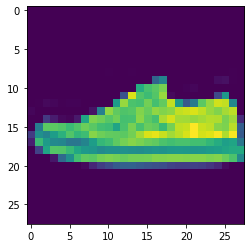

In [7]:
image1=x_train_set[1, :].reshape((28,28))
plt.imshow(image1)

In [8]:
# pca lowers the amount of features,
# here we are making our data set contain the features that represent 90% of the variance.

In [9]:
pca=PCA(n_components=0.9)
x_train_reduced=pca.fit_transform(x_train_set)
x_train_recovered=pca.inverse_transform(x_train_reduced)

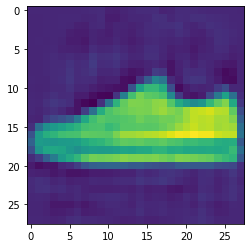

In [10]:
image1=x_train_recovered[1, :].reshape((28,28))
plt.imshow(image1)

# Training the models

Because this data set has 784 features I will start running the models after I have lowered the amount of features by using PCA.
<br> I did not normalize the data because all of the features are between 0-255, because they represent pixels of a grey scale picture.

In [11]:
# function to represent the confusion matrix nicely
def confussion_matrix(cf_matrix):
    plt.figure(figsize=(10,10))
    sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Greens')

In [12]:
# here we are making our data set contain the features that represent 90% of the variance.
pca1=PCA(n_components=0.9)
x_train_reduced1=pca1.fit_transform(x_train_set)
x_test_reduced1=pca1.transform(x_test_set)

In [13]:
# this data set has 84 features
pca1.n_components_

84

## KNN1

In [14]:
for x in range (3,50):
    knn1 = KNeighborsClassifier(n_neighbors=x)
    knn1.fit(x_train_reduced1, y_train_set)
    y_pred_knn1=knn1.predict(x_test_reduced1)
    accuracy_knn1=metrics.accuracy_score(y_test_set, y_pred_knn1)
    if (accuracy_knn1>0.85):
        print(x, accuracy_knn1)
    else:
        print(x)   

3 0.85925
4 0.8603333333333333
5 0.8615833333333334
6 0.8604166666666667
7 0.8586666666666667
8 0.8600833333333333
9 0.8585833333333334
10 0.8584166666666667
11 0.858
12 0.8585833333333334
13 0.8579166666666667
14 0.8568333333333333
15 0.8565
16 0.8564166666666667
17 0.8569166666666667
18 0.8564166666666667
19 0.8545833333333334
20 0.8538333333333333
21 0.8529166666666667
22 0.8530833333333333
23 0.85225
24 0.853
25 0.8515833333333334
26 0.852
27 0.85025
28
29 0.8503333333333334
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [15]:
# the best result is with 5 neighbors

In [16]:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(x_train_reduced1, y_train_set)
y_pred_knn1=knn1.predict(x_test_reduced1)
accuracy_knn1=metrics.accuracy_score(y_test_set, y_pred_knn1)
accuracy_knn1

0.8615833333333334

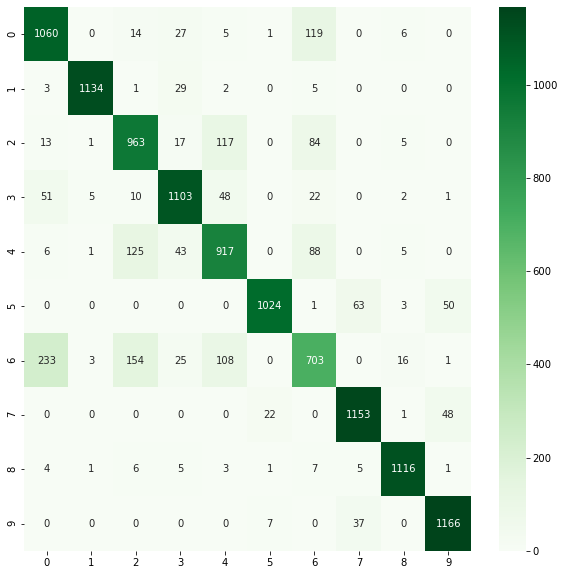

In [17]:
# confusion matrix
mat_knn1=confusion_matrix(y_test_set, y_pred_knn1)
confussion_matrix(mat_knn1)

In [18]:
# precision score, recall score, f1 score
print("precision_score_knn:",precision_score(y_test_set, y_pred_knn1, average='weighted')) 
print("recall_score_knn:",recall_score(y_test_set, y_pred_knn1,average='weighted'))
print("f1_score_knn:",f1_score(y_test_set, y_pred_knn1,average='weighted'))

precision_score_knn: 0.8607751454082296
recall_score_knn: 0.8615833333333334
f1_score_knn: 0.8600781609884743


In [19]:
#cross validation
cv_scores_knn1=cross_val_score(knn1, x_train_reduced1, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_knn1, "mean:", np.mean(cv_scores_knn1))

[0.85885417 0.8640625  0.86072917 0.8521875  0.8534375 ] mean: 0.8578541666666666


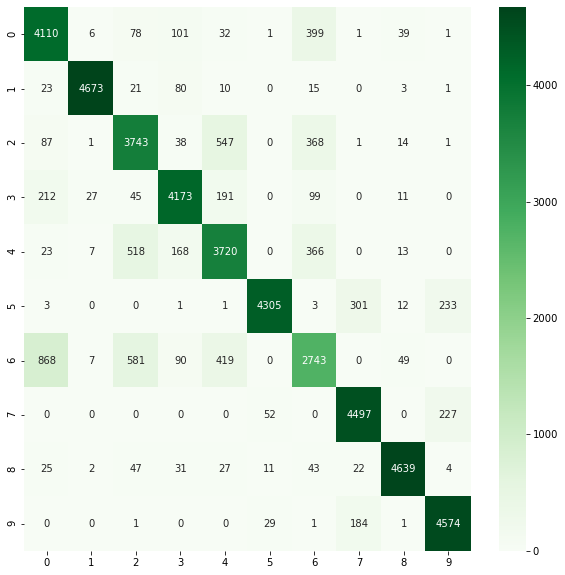

In [20]:
# confusion matrix
y_pred_knn1_c = cross_val_predict(knn1,  x_train_reduced1, y_train_set, cv=5)
cofussion_knn1=confusion_matrix(y_train_set, y_pred_knn1_c)
confussion_matrix(cofussion_knn1)

In [21]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_knn1_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_knn1_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_knn1_c,average='weighted'))

precision_score: 0.8583256850602045
recall_score: 0.8578541666666667
f1_score: 0.8569793134465262


## XG1

In [22]:
arr=np.arange(25,525,25)
arr

array([ 25,  50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325,
       350, 375, 400, 425, 450, 475, 500])

In [23]:
for x in arr:
    XG1 = XGBClassifier(n_estimators=x, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
    XG1.fit(x_train_reduced1, y_train_set)
    y_pred_XG1=XG1.predict(x_test_reduced1)
    accuracy_XG1=metrics.accuracy_score(y_test_set, y_pred_XG1)
    if (accuracy_XG1>0.85):
        print(x, accuracy_XG1)
    else:
        print(x)  

25
50
75
100
125
150
175
200
225
250
275
300
325 0.8523333333333334
350 0.85425
375 0.8563333333333333
400 0.857
425 0.8585833333333334
450 0.85875
475 0.8600833333333333
500 0.8609166666666667


In [24]:
XG1=XGBClassifier(n_estimators=500, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
XG1.fit(x_train_reduced1, y_train_set)
y_pred_XG1=XG1.predict(x_test_reduced1)
accuracy_XG1=metrics.accuracy_score(y_test_set, y_pred_XG1)
accuracy_XG1

0.8609166666666667

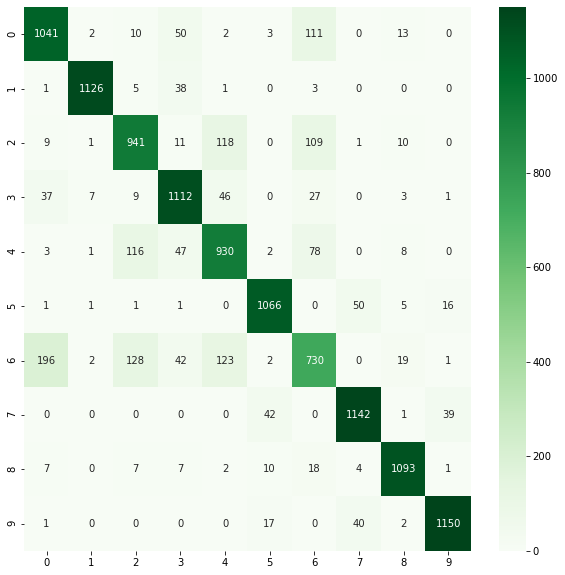

In [25]:
# confusion matrix
mat_XG1=confusion_matrix(y_test_set, y_pred_XG1)
confussion_matrix(mat_XG1)

In [26]:
# precision score, recall score, f1 score
print("precision_score_XG1:",precision_score(y_test_set, y_pred_XG1, average='weighted')) 
print("recall_score_XG1:",recall_score(y_test_set, y_pred_XG1,average='weighted'))
print("f1_score_XG1:",f1_score(y_test_set, y_pred_XG1,average='weighted'))

precision_score_XG1: 0.8594411703455085
recall_score_XG1: 0.8609166666666667
f1_score_XG1: 0.8596786174870202


In [27]:
#cross validation
cv_scores_XG1=cross_val_score(XG1, x_train_reduced1, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_XG1, "mean:", np.mean(cv_scores_XG1))

[0.86395833 0.8640625  0.86208333 0.85479167 0.8640625 ] mean: 0.8617916666666666


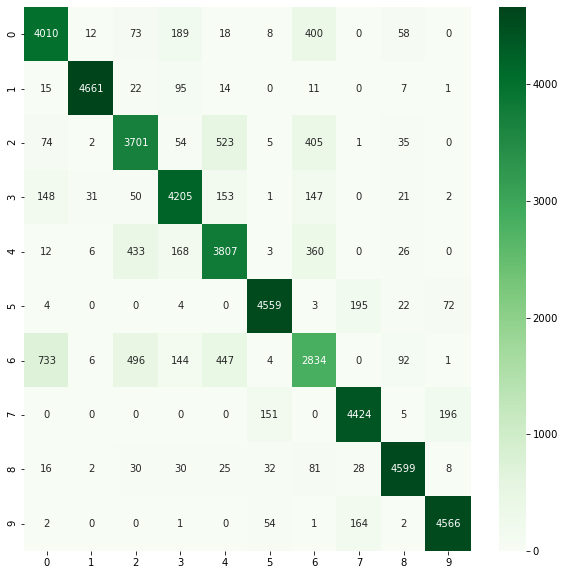

In [28]:
# confusion matrix
y_pred_xg1_c = cross_val_predict(XG1,  x_train_reduced1, y_train_set, cv=5)
cofussion_xg1=confusion_matrix(y_train_set, y_pred_xg1_c)
confussion_matrix(cofussion_xg1)

In [29]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_xg1_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_xg1_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_xg1_c,average='weighted'))

precision_score: 0.8605854782858353
recall_score: 0.8617916666666666
f1_score: 0.8608730772924114


## Random  Forest1

In [30]:
forest1= RandomForestClassifier(random_state=42)
forest1.fit(x_train_reduced1, y_train_set)
y_pred_forest1=forest1.predict(x_test_reduced1)
accuracy_forest1=metrics.accuracy_score(y_test_set, y_pred_forest1)
accuracy_forest1

0.86625

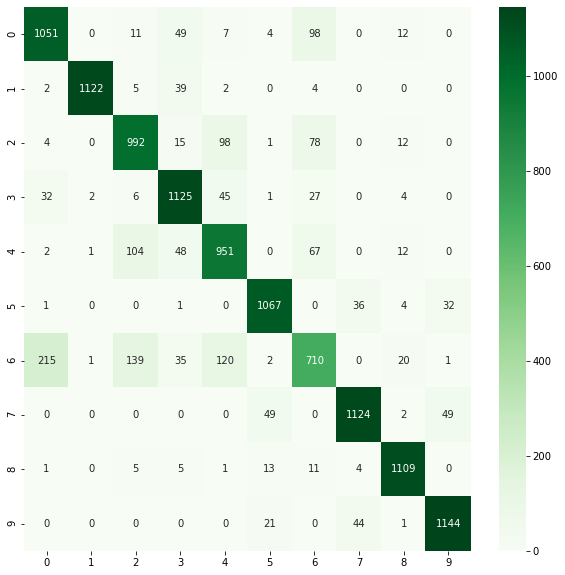

In [31]:
mat_forest1=confusion_matrix(y_test_set, y_pred_forest1)
confussion_matrix(mat_forest1)

In [32]:
# precision score, recall score, f1 score
print("precision_score_forest1:",precision_score(y_test_set, y_pred_forest1, average='weighted')) 
print("recall_score_forest1:",recall_score(y_test_set, y_pred_forest1,average='weighted'))
print("f1_score_forest1:",f1_score(y_test_set,y_pred_forest1,average='weighted'))

precision_score_forest1: 0.8645379927952666
recall_score_forest1: 0.86625
f1_score_forest1: 0.8642840601128841


In [33]:
#cross validation
cv_scores_forest1=cross_val_score(forest1, x_train_reduced1, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_forest1, "mean:", np.mean(cv_scores_forest1))

[0.86395833 0.86625    0.86447917 0.86416667 0.86270833] mean: 0.8643124999999999


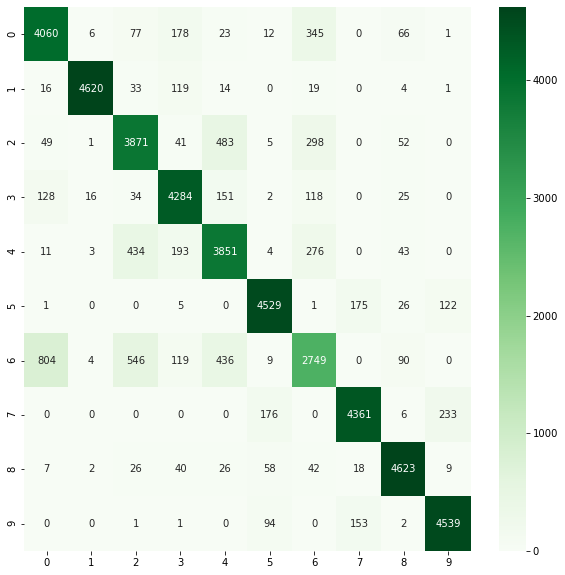

In [34]:
# confusion matrix
y_pred_forest1_c = cross_val_predict(forest1,  x_train_reduced1, y_train_set, cv=5)
cofussion_forest1=confusion_matrix(y_train_set, y_pred_forest1_c)
confussion_matrix(cofussion_forest1)

In [35]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_forest1_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_forest1_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_forest1_c,average='weighted'))

precision_score: 0.8629031612661485
recall_score: 0.8643125
f1_score: 0.8626445693968018


# VOTE1

In [36]:
vote1=VotingClassifier(estimators=[('knn1',knn1),('XG1',XG1),('forest1',forest1)], voting='soft', )
vote1.fit(x_train_reduced1, y_train_set)
vote1.fit(x_train_reduced1, y_train_set)
y_pred_vote1=vote1.predict(x_test_reduced1)
accuracy_vote1=metrics.accuracy_score(y_test_set, y_pred_vote1)
accuracy_vote1

0.876

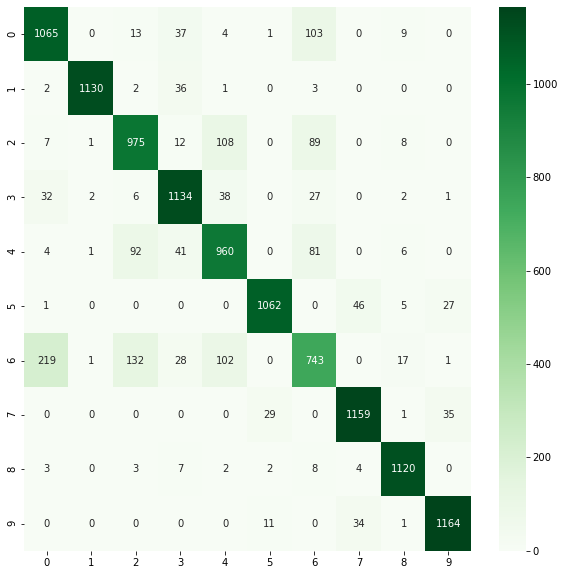

In [37]:
# confusion matrix
mat_vote1=confusion_matrix(y_test_set, y_pred_vote1)
confussion_matrix(mat_vote1)

In [38]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_test_set, y_pred_vote1,average='weighted')) 
print("recall_score:",recall_score(y_test_set, y_pred_vote1,average='weighted'))
print("f1_score:",f1_score(y_test_set, y_pred_vote1,average='weighted'))

precision_score: 0.8746313053545388
recall_score: 0.876
f1_score: 0.8745982360659329


In [39]:
#cross validation
cv_scores_vote1=cross_val_score(vote1, x_train_reduced1, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_vote1, "mean:", np.mean(cv_scores_vote1))

[0.8771875  0.87760417 0.87635417 0.868125   0.8734375 ] mean: 0.8745416666666668


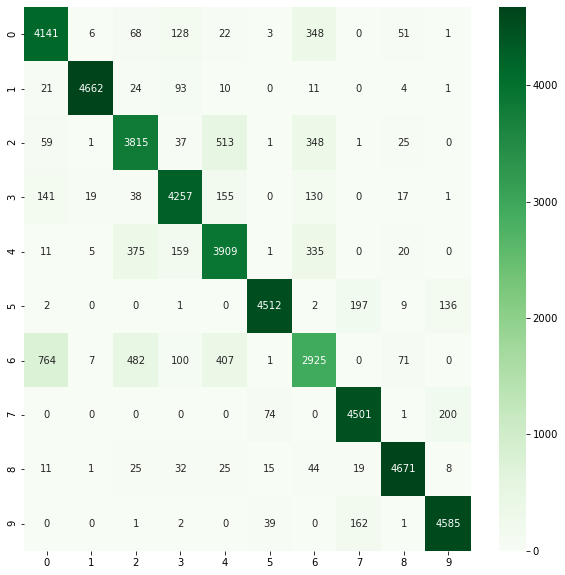

In [40]:
# confusion matrix
y_pred_vote1_c = cross_val_predict(vote1,  x_train_reduced1, y_train_set, cv=5)
cofussion_vote1=confusion_matrix(y_train_set, y_pred_vote1_c)
confussion_matrix(cofussion_vote1)

In [41]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_vote1_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_vote1_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_vote1_c,average='weighted'))

precision_score: 0.8738849055944802
recall_score: 0.8745416666666667
f1_score: 0.8736370489140325


### The best model with PCA 0.9 when checking with cross validation is the Voting classifier with 87.45% success.

# PCA 0.8

In [42]:
# here we our making are data set contain the features that represent 80% of the variance.

In [43]:
pca2=PCA(n_components=0.8)
x_train_reduced2=pca2.fit_transform(x_train_set)
x_test_reduced2=pca2.transform(x_test_set)


In [44]:
# this data set has 24 features
pca2.n_components_

24

## KNN2

In [45]:
for x in range (3,50):
    knn2 = KNeighborsClassifier(n_neighbors=x)
    knn2.fit(x_train_reduced2, y_train_set)
    y_pred_knn2=knn2.predict(x_test_reduced2)
    accuracy_knn2=metrics.accuracy_score(y_test_set, y_pred_knn2)
    if (accuracy_knn2>0.84):
        print(x, accuracy_knn2)
    else:
        print(x)   

3 0.8425833333333334
4 0.8464166666666667
5 0.8475
6 0.8475833333333334
7 0.847
8 0.84725
9 0.8455
10 0.84625
11 0.8456666666666667
12 0.8460833333333333
13 0.8451666666666666
14 0.8454166666666667
15 0.8441666666666666
16 0.8450833333333333
17 0.84425
18 0.84575
19 0.8445
20 0.8444166666666667
21 0.8430833333333333
22 0.84375
23 0.8425833333333334
24 0.8426666666666667
25 0.8425
26 0.84275
27 0.8411666666666666
28 0.84125
29 0.8411666666666666
30 0.8406666666666667
31
32 0.8403333333333334
33 0.84025
34 0.8405833333333333
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [46]:
# the best result is with  6 neighbors

In [129]:
knn2 = KNeighborsClassifier(n_neighbors=6)
knn2.fit(x_train_reduced2, y_train_set)
y_pred_knn2=knn2.predict(x_test_reduced2)
accuracy_knn2=metrics.accuracy_score(y_test_set, y_pred_knn2)
accuracy_knn2

0.8475833333333334

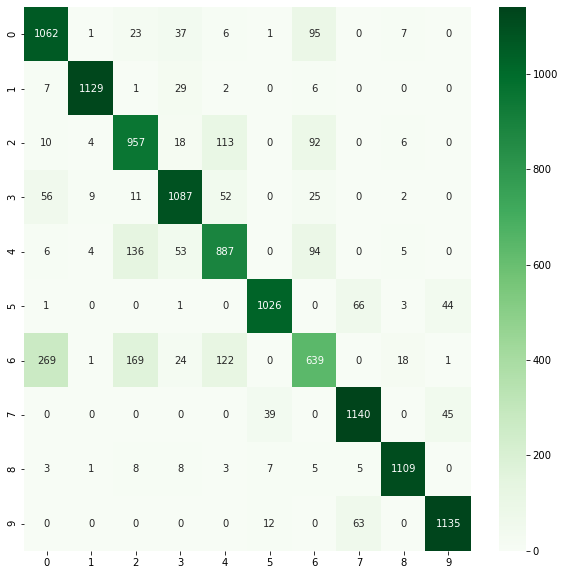

In [130]:
# confusion matrix
mat_knn2=confusion_matrix(y_test_set, y_pred_knn2)
confussion_matrix(mat_knn2)

In [131]:
# precision score, recall score, f1 score
print("precision_score_knn2:",precision_score(y_test_set, y_pred_knn2, average='weighted')) 
print("recall_score_knn2:",recall_score(y_test_set, y_pred_knn2,average='weighted'))
print("f1_score_knn2:",f1_score(y_test_set, y_pred_knn2,average='weighted'))

precision_score_knn2: 0.8461738041414596
recall_score_knn2: 0.8475833333333334
f1_score_knn2: 0.8451984578638929


In [132]:
#cross validation
cv_scores_knn2=cross_val_score(knn2, x_train_reduced2, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_knn2, "mean:", np.mean(cv_scores_knn2))

[0.85260417 0.85177083 0.85020833 0.84208333 0.84416667] mean: 0.8481666666666665


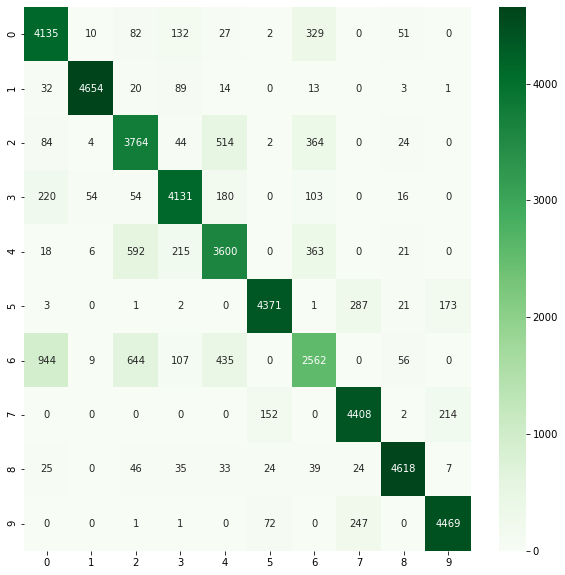

In [133]:
# confusion matrix
y_pred_knn2_c = cross_val_predict(knn2,  x_train_reduced2, y_train_set, cv=5)
cofussion_knn2=confusion_matrix(y_train_set, y_pred_knn2_c)
confussion_matrix(cofussion_knn2)

In [134]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_knn1_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_knn1_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_knn1_c,average='weighted'))

precision_score: 0.8583256850602045
recall_score: 0.8578541666666667
f1_score: 0.8569793134465262


## XG2

In [53]:
for x in arr:
    XG2 = XGBClassifier(n_estimators=x, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
    XG2.fit(x_train_reduced2, y_train_set)
    y_pred_XG2=XG2.predict(x_test_reduced2)
    accuracy_XG2=metrics.accuracy_score(y_test_set, y_pred_XG2)
    if (accuracy_XG2>0.84):
        print(x, accuracy_XG2)
    else:
        print(x)  

25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400
425 0.84075
450 0.842
475 0.8420833333333333
500 0.8429166666666666


In [54]:
XG2=XGBClassifier(n_estimators=500, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
XG2.fit(x_train_reduced2, y_train_set)
y_pred_XG2=XG2.predict(x_test_reduced2)
accuracy_XG2=metrics.accuracy_score(y_test_set, y_pred_XG2)
accuracy_XG2

0.8429166666666666

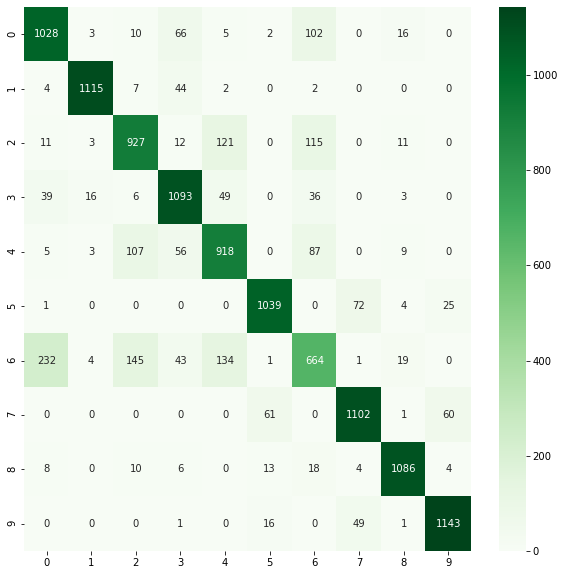

In [55]:
# confusion matrix
mat_XG2=confusion_matrix(y_test_set, y_pred_XG2)
confussion_matrix(mat_XG2)

In [56]:
# precision score, recall score, f1 score
print("precision_score_XG2:",precision_score(y_test_set, y_pred_XG2, average='weighted')) 
print("recall_score_XG2:",recall_score(y_test_set, y_pred_XG2,average='weighted'))
print("f1_score_XG2:",f1_score(y_test_set, y_pred_XG2,average='weighted'))

precision_score_XG2: 0.8406534328834173
recall_score_XG2: 0.8429166666666666
f1_score_XG2: 0.8409614692062595


In [57]:
#cross validation
cv_scores_XG2=cross_val_score(XG2, x_train_reduced2, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_XG2, "mean:", np.mean(cv_scores_XG2))

[0.850625   0.84833333 0.85270833 0.8434375  0.84302083] mean: 0.8476250000000001


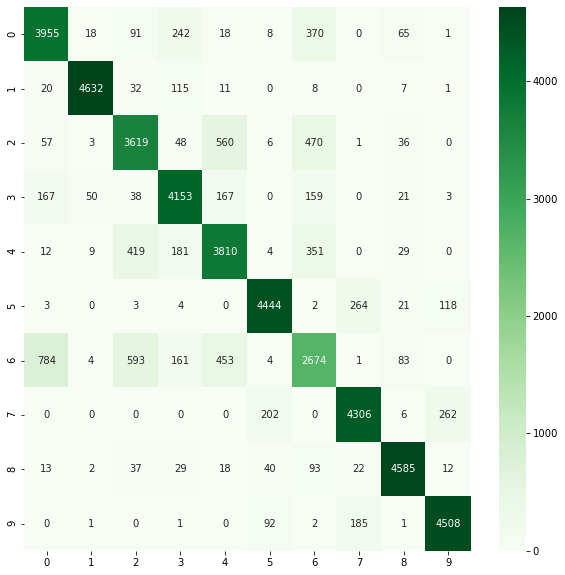

In [58]:
y_pred_xg2_c = cross_val_predict(XG2,  x_train_reduced2, y_train_set, cv=5)
cofussion_xg2=confusion_matrix(y_train_set, y_pred_xg2_c)
confussion_matrix(cofussion_xg2)

In [59]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_xg2_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_xg2_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_xg2_c,average='weighted'))

precision_score: 0.8460271667657744
recall_score: 0.847625
f1_score: 0.846379950673067


## Random forest2

In [60]:
forest2= RandomForestClassifier(random_state=42)
forest2.fit(x_train_reduced2, y_train_set)
y_pred_forest2=forest2.predict(x_test_reduced2)
accuracy_forest2=metrics.accuracy_score(y_test_set, y_pred_forest2)
accuracy_forest2

0.8555

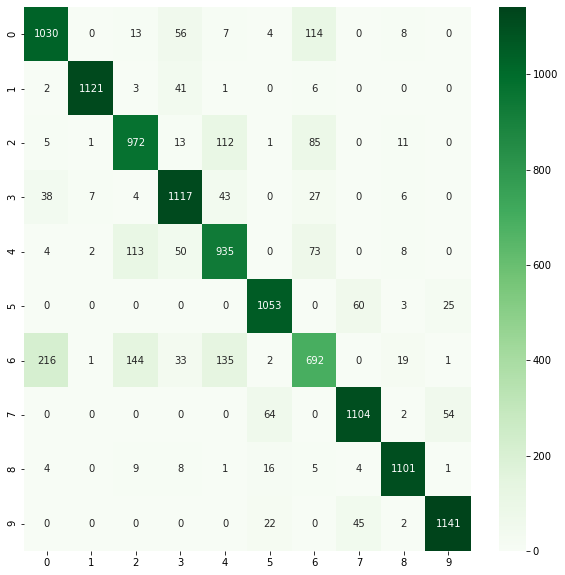

In [61]:
# confussion matrix
mat_forest2=confusion_matrix(y_test_set, y_pred_forest2)
confussion_matrix(mat_forest2)

In [62]:
# precision score, recall score, f1 score
print("precision_score_forest2:",precision_score(y_test_set, y_pred_forest2, average='weighted')) 
print("recall_score_forest2:",recall_score(y_test_set, y_pred_forest2,average='weighted'))
print("f1_score_forest2:",f1_score(y_test_set,y_pred_forest2,average='weighted'))

precision_score_forest2: 0.8536575753329788
recall_score_forest2: 0.8555
f1_score_forest2: 0.8535756022404357


In [63]:
#cross validation
cv_scores_forest2=cross_val_score(forest2, x_train_reduced2, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_forest2, "mean:", np.mean(cv_scores_forest2))

[0.86010417 0.855625   0.8578125  0.85489583 0.856875  ] mean: 0.8570625


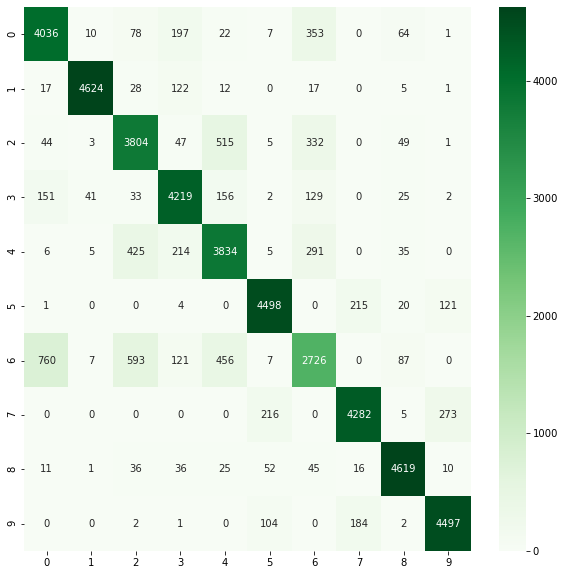

In [64]:
# confusion matrix
y_pred_forest2_c = cross_val_predict(forest2,  x_train_reduced2, y_train_set, cv=5)
cofussion_forest2=confusion_matrix(y_train_set, y_pred_forest2_c)
confussion_matrix(cofussion_forest2)

In [65]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_forest2_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_forest2_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_forest2_c,average='weighted'))

precision_score: 0.8555108752531416
recall_score: 0.8570625
f1_score: 0.8554526411838127


## VOTE2

In [66]:
vote2=VotingClassifier(estimators=[('knn2',knn2),('XG2',XG2),('forest2',forest2)], voting='soft',weights=[0.3,0.3,0.4,])
vote2.fit(x_train_reduced2, y_train_set)
y_pred_vote2=vote2.predict(x_test_reduced2)
accuracy_vote2=metrics.accuracy_score(y_test_set, y_pred_vote2)
accuracy_vote2

0.85925

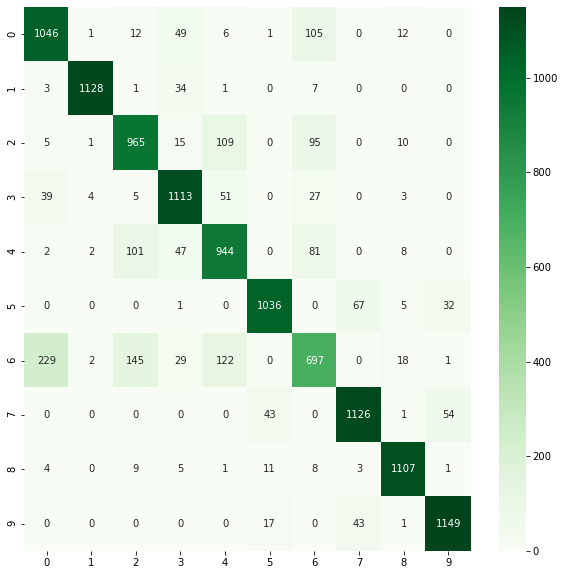

In [67]:
# confussion matrix
mat_vote2=confusion_matrix(y_test_set, y_pred_vote2)
confussion_matrix(mat_vote2)

In [68]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_test_set, y_pred_vote2,average='weighted')) 
print("recall_score:",recall_score(y_test_set, y_pred_vote2,average='weighted'))
print("f1_score:",f1_score(y_test_set, y_pred_vote2,average='weighted'))

precision_score: 0.8574490264744761
recall_score: 0.85925
f1_score: 0.8574566346588632


In [69]:
#cross validation
cv_scores_vote2=cross_val_score(vote2, x_train_reduced2, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_vote2, "mean:", np.mean(cv_scores_vote2))

[0.865      0.8621875  0.861875   0.8553125  0.85739583] mean: 0.8603541666666666


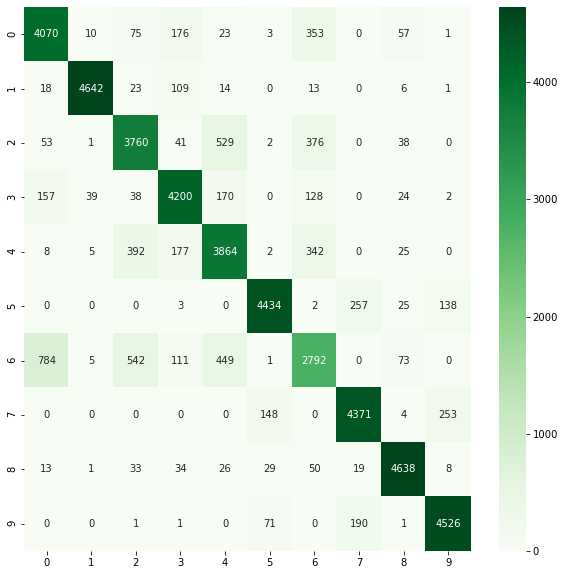

In [70]:
# confusion matrix
y_pred_vote2_c = cross_val_predict(vote2,  x_train_reduced2, y_train_set, cv=5)
cofussion_vote2=confusion_matrix(y_train_set, y_pred_vote2_c)
confussion_matrix(cofussion_vote2)

In [71]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_vote2_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_vote2_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_vote2_c,average='weighted'))

precision_score: 0.8592509624152483
recall_score: 0.8603541666666666
f1_score: 0.8591723209992862


### The best model with PCA 0.8 when checking with cross validation is the Voting classifier with 86% success.

# PCA 0.7

In [72]:
# here we are making our data set contain the features that represent 70% of the variance.

pca3=PCA(n_components=0.7)
x_train_reduced3=pca3.fit_transform(x_train_set)
x_test_reduced3=pca3.transform(x_test_set)

In [73]:
# this data set has 9 features
pca3.n_components_

9

## KNN3

In [74]:
for x in range (3,50):
    knn3 = KNeighborsClassifier(n_neighbors=x)
    knn3.fit(x_train_reduced3, y_train_set)
    y_pred_knn3=knn3.predict(x_test_reduced3)
    accuracy_knn3=metrics.accuracy_score(y_test_set, y_pred_knn3)
    if (accuracy_knn3>0.80):
        print(x, accuracy_knn3)
    else:
        print(x)   

3
4 0.8043333333333333
5 0.8086666666666666
6 0.8098333333333333
7 0.8099166666666666
8 0.8115833333333333
9 0.80975
10 0.8093333333333333
11 0.8096666666666666
12 0.81
13 0.81025
14 0.8094166666666667
15 0.8096666666666666
16 0.8100833333333334
17 0.81025
18 0.8088333333333333
19 0.8081666666666667
20 0.80775
21 0.8076666666666666
22 0.8065
23 0.80675
24 0.8056666666666666
25 0.805
26 0.8059166666666666
27 0.805
28 0.8048333333333333
29 0.8048333333333333
30 0.8036666666666666
31 0.80225
32 0.8036666666666666
33 0.8021666666666667
34 0.8024166666666667
35 0.8023333333333333
36 0.8024166666666667
37 0.8033333333333333
38 0.803
39 0.8024166666666667
40 0.8033333333333333
41 0.803
42 0.8026666666666666
43 0.8018333333333333
44 0.8021666666666667
45 0.80025
46 0.8003333333333333
47 0.8003333333333333
48 0.8008333333333333
49 0.8010833333333334


In [75]:
# the best result is with  8 neighbors

In [76]:
knn3 = KNeighborsClassifier(n_neighbors=8)
knn3.fit(x_train_reduced3, y_train_set)
y_pred_knn3=knn3.predict(x_test_reduced3)
accuracy_knn3=metrics.accuracy_score(y_test_set, y_pred_knn3)
accuracy_knn3

0.8115833333333333

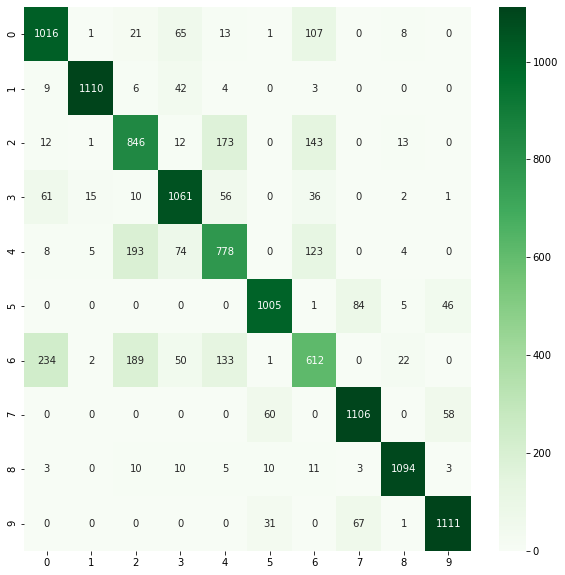

In [77]:
# confusion matrix
mat_knn3=confusion_matrix(y_test_set, y_pred_knn3)
confussion_matrix(mat_knn3)

In [78]:
# precision score, recall score, f1 score
print("precision_score_knn3:",precision_score(y_test_set, y_pred_knn3, average='weighted')) 
print("recall_score_knn3:",recall_score(y_test_set, y_pred_knn3,average='weighted'))
print("f1_score_knn3:",f1_score(y_test_set, y_pred_knn3,average='weighted'))

precision_score_knn3: 0.8095074502340963
recall_score_knn3: 0.8115833333333333
f1_score_knn3: 0.8097275034784572


In [79]:
#cross validation
cv_scores_knn3=cross_val_score(knn3, x_train_reduced3, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_knn3, "mean:", np.mean(cv_scores_knn3))

[0.8084375 0.8059375 0.808125  0.8046875 0.8065625] mean: 0.8067499999999999


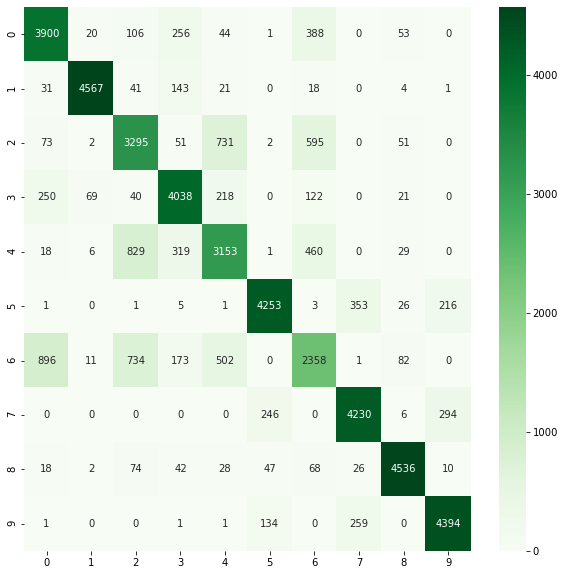

In [80]:
# confusion matrix
y_pred_knn3_c = cross_val_predict(knn3,  x_train_reduced3, y_train_set, cv=5)
cofussion_knn3=confusion_matrix(y_train_set, y_pred_knn3_c)
confussion_matrix(cofussion_knn3)

In [81]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_knn3_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_knn3_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_knn3_c,average='weighted'))

precision_score: 0.8052835650734805
recall_score: 0.80675
f1_score: 0.8052700291601997


## XG3

In [82]:
for x in arr:
    XG3 = XGBClassifier(n_estimators=x, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
    XG3.fit(x_train_reduced3, y_train_set)
    y_pred_XG3=XG3.predict(x_test_reduced3)
    accuracy_XG3=metrics.accuracy_score(y_test_set, y_pred_XG3)
    print(x, accuracy_XG3)

25 0.71425
50 0.7295
75 0.7455833333333334
100 0.7561666666666667
125 0.7650833333333333
150 0.7695
175 0.77375
200 0.7760833333333333
225 0.7800833333333334
250 0.7840833333333334
275 0.7874166666666667
300 0.7883333333333333
325 0.79
350 0.792
375 0.7934166666666667
400 0.7936666666666666
425 0.7955833333333333
450 0.7963333333333333
475 0.7970833333333334
500 0.79775


In [83]:
XG3=XGBClassifier(n_estimators=500, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
XG3.fit(x_train_reduced3, y_train_set)
y_pred_XG3=XG3.predict(x_test_reduced3)
accuracy_XG3=metrics.accuracy_score(y_test_set, y_pred_XG3)
accuracy_XG3

0.79775

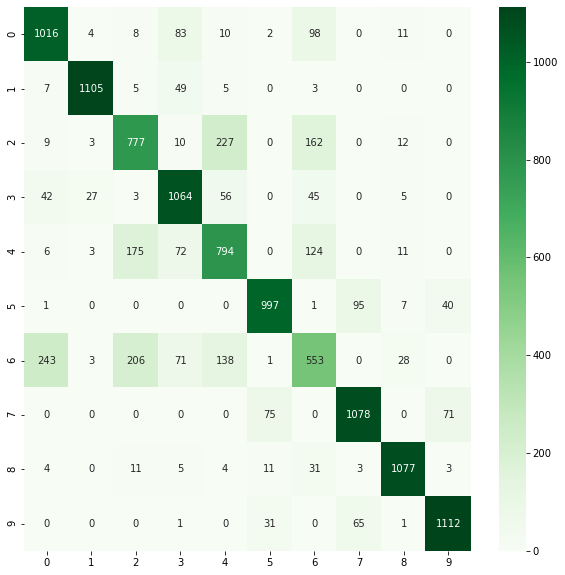

In [84]:
# confusion matrix
mat_XG3=confusion_matrix(y_test_set, y_pred_XG3)
confussion_matrix(mat_XG3)

In [85]:
# precision score, recall score, f1 score
print("precision_score_XG3:",precision_score(y_test_set, y_pred_XG3, average='weighted')) 
print("recall_score_XG3:",recall_score(y_test_set, y_pred_XG3,average='weighted'))
print("f1_score_XG3:",f1_score(y_test_set, y_pred_XG3,average='weighted'))

precision_score_XG3: 0.7941118834555203
recall_score_XG3: 0.79775
f1_score_XG3: 0.7950816503409053


In [86]:
#cross validation
cv_scores_XG3=cross_val_score(XG3, x_train_reduced3, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_XG3, "mean:", np.mean(cv_scores_XG3))

[0.801875   0.79729167 0.80072917 0.79614583 0.79614583] mean: 0.7984375


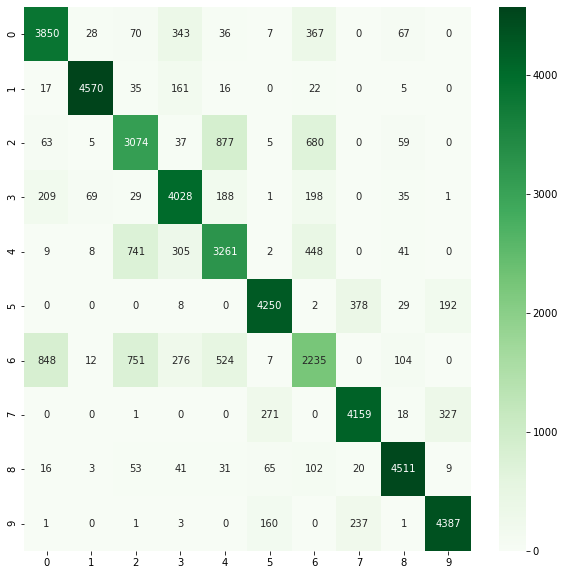

In [87]:
# confusion matrix
y_pred_xg3_c = cross_val_predict(XG3,  x_train_reduced3, y_train_set, cv=5)
cofussion_xg3=confusion_matrix(y_train_set, y_pred_xg3_c)
confussion_matrix(cofussion_xg3)

In [88]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_xg3_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_xg3_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_xg3_c,average='weighted'))

precision_score: 0.7957222344585545
recall_score: 0.7984375
f1_score: 0.7964956196551071


## Random forest3

In [89]:
forest3= RandomForestClassifier(random_state=42)
forest3.fit(x_train_reduced3, y_train_set)
y_pred_forest3=forest3.predict(x_test_reduced3)
accuracy_forest3=metrics.accuracy_score(y_test_set, y_pred_forest3)
accuracy_forest3

0.81625

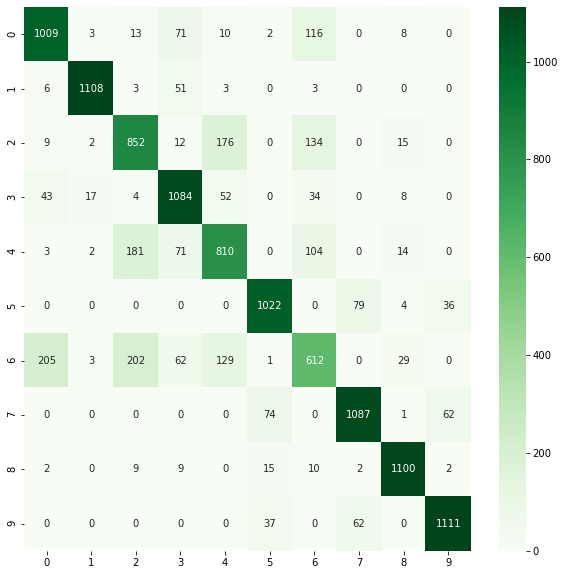

In [90]:
# confussion matrix
mat_forest3=confusion_matrix(y_test_set, y_pred_forest3)
confussion_matrix(mat_forest3)

In [91]:
# precision score, recall score, f1 score
print("precision_score_forest3:",precision_score(y_test_set, y_pred_forest3, average='weighted')) 
print("recall_score_forest3:",recall_score(y_test_set, y_pred_forest3,average='weighted'))
print("f1_score_forest3:",f1_score(y_test_set,y_pred_forest3,average='weighted'))

precision_score_forest3: 0.8133017467489501
recall_score_forest3: 0.81625
f1_score_forest3: 0.8138903339421892


In [92]:
# cross validation
cv_scores_forest3=cross_val_score(forest3, x_train_reduced3, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_forest3, "mean:", np.mean(cv_scores_forest3))


[0.82333333 0.8146875  0.81895833 0.81760417 0.8165625 ] mean: 0.8182291666666666


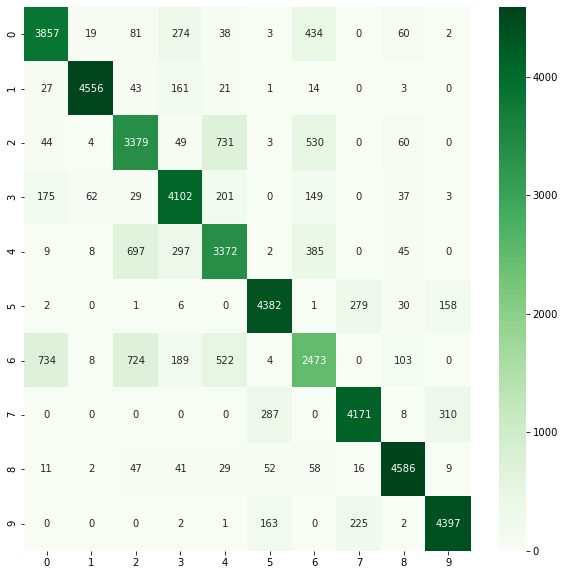

In [93]:
# confusion matrix
y_pred_forest3_c = cross_val_predict(forest3,  x_train_reduced3, y_train_set, cv=5)
cofussion_forest3=confusion_matrix(y_train_set, y_pred_forest3_c)
confussion_matrix(cofussion_forest3)

In [94]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_forest3_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_forest3_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_forest3_c,average='weighted'))

precision_score: 0.8164818041453654
recall_score: 0.8182291666666667
f1_score: 0.8167798659281227


## VOTE3

In [163]:
vote3=VotingClassifier(estimators=[('knn3',knn3),('XG3',XG3),('forest3',forest3)], voting='soft',weights=[0.3,0.3,0.5,])
vote3.fit(x_train_reduced3, y_train_set)
y_pred_vote3=vote3.predict(x_test_reduced3)
accuracy_vote3=metrics.accuracy_score(y_test_set, y_pred_vote3)
accuracy_vote3

0.8184166666666667

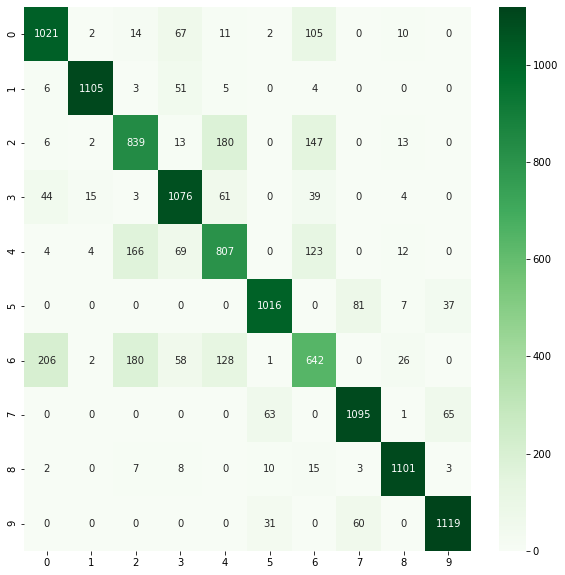

In [164]:
# confusion matrix
mat_vote3=confusion_matrix(y_test_set, y_pred_vote3)
confussion_matrix(mat_vote3)

In [165]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_test_set, y_pred_vote3,average='weighted')) 
print("recall_score:",recall_score(y_test_set, y_pred_vote3,average='weighted'))
print("f1_score:",f1_score(y_test_set, y_pred_vote3,average='weighted'))

precision_score: 0.8160639736565876
recall_score: 0.8184166666666667
f1_score: 0.816706634174576


In [166]:
#cross validation
cv_scores_vote3=cross_val_score(vote1, x_train_reduced3, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_vote3, "mean:", np.mean(cv_scores_vote3))

[0.82145833 0.8178125  0.82010417 0.81635417 0.81885417] mean: 0.8189166666666665


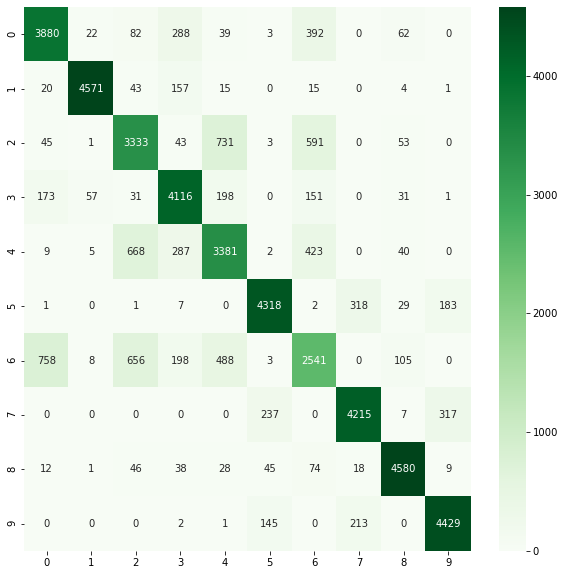

In [167]:
# confusion matrix
y_pred_vote3_c = cross_val_predict(vote3,  x_train_reduced3, y_train_set, cv=5)
cofussion_vote3=confusion_matrix(y_train_set, y_pred_vote3_c)
confussion_matrix(cofussion_vote3)

In [168]:
# precision score, recall score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_vote3_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_vote3_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_vote3_c,average='weighted'))

precision_score: 0.8184836184049786
recall_score: 0.8200833333333334
f1_score: 0.818851087585044


### The best model with PCA 0.7 when checking with cross validation is the Voting classifier with 81.89% success.

# Testing data

# PCA 0.9

In [101]:
x_testing_set_dont_touch_reduced1=pca1.transform(x_testing_set_dont_touch)

## KNN1

In [102]:
y_pred_knn1_test=knn1.predict(x_testing_set_dont_touch_reduced1)
accuracy_knn1_test=metrics.accuracy_score(y_testing_set_dont_touch,y_pred_knn1_test)
accuracy_knn1_test

0.8641

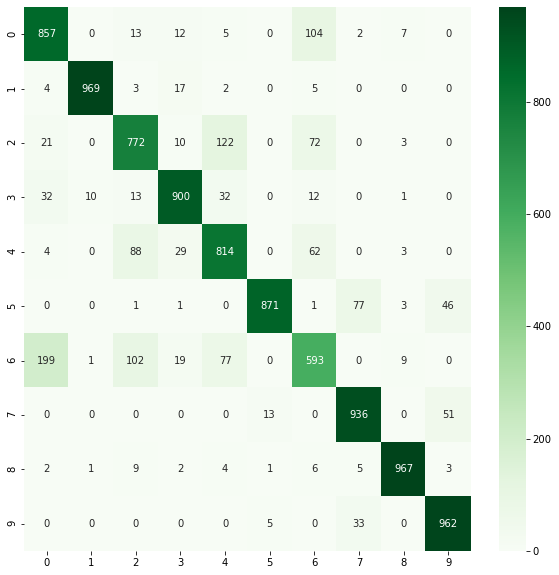

In [103]:
# confusion matrix
mat_knn1_test=confusion_matrix(y_testing_set_dont_touch, y_pred_knn1_test)
confussion_matrix(mat_knn1_test)

In [104]:
# precision score, recall score, f1 score
print("precision_score_vote:",precision_score(y_testing_set_dont_touch, y_pred_knn1_test,average='weighted')) 
print("recall_score_vote:",recall_score(y_testing_set_dont_touch, y_pred_knn1_test,average='weighted'))
print("f1_score_vote:",f1_score(y_testing_set_dont_touch, y_pred_knn1_test,average='weighted'))

precision_score_vote: 0.8645545559067834
recall_score_vote: 0.8641
f1_score_vote: 0.8631485130862536


## XG1

In [105]:
y_pred_xg1_test=XG1.predict(x_testing_set_dont_touch_reduced1)
accuracy_xg1_test=metrics.accuracy_score(y_testing_set_dont_touch,y_pred_xg1_test)
accuracy_xg1_test

0.8648

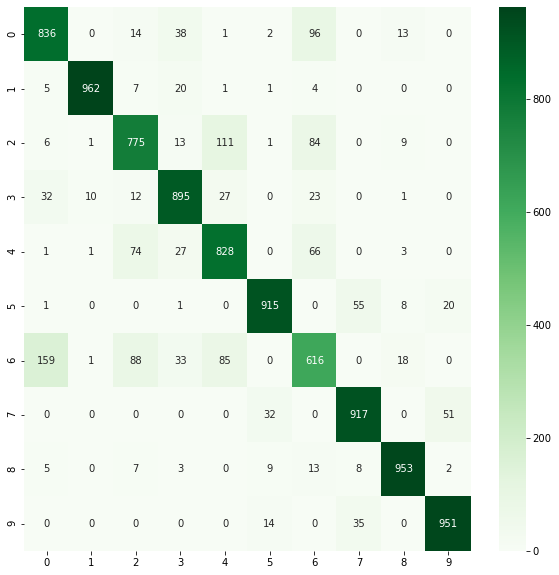

In [106]:
# confusion matrix
mat_xg1_test=confusion_matrix(y_testing_set_dont_touch, y_pred_xg1_test)
confussion_matrix(mat_xg1_test)

In [107]:
# precision score, recall score, f1 score
print("precision_score_vote:",precision_score(y_testing_set_dont_touch, y_pred_xg1_test,average='weighted')) 
print("recall_score_vote:",recall_score(y_testing_set_dont_touch, y_pred_xg1_test,average='weighted'))
print("f1_score_vote:",f1_score(y_testing_set_dont_touch, y_pred_xg1_test,average='weighted'))

precision_score_vote: 0.86379379186665
recall_score_vote: 0.8648
f1_score_vote: 0.8639506516776461


## RANDOM FOREST1

In [108]:
y_pred_forest1_test=forest1.predict(x_testing_set_dont_touch_reduced1)
accuracy_forest1_test=metrics.accuracy_score(y_testing_set_dont_touch,y_pred_forest1_test)
accuracy_forest1_test

0.8663

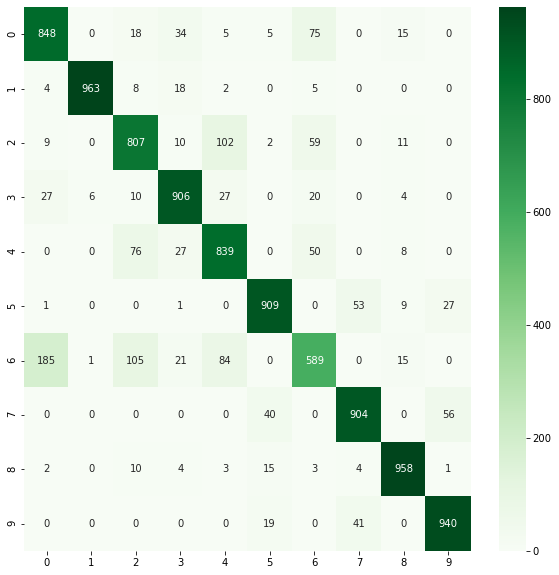

In [109]:
# confusion matrix
mat_forest1_test=confusion_matrix(y_testing_set_dont_touch, y_pred_forest1_test)
confussion_matrix(mat_forest1_test)

In [110]:
# precision score, recall score, f1 score
print("precision_score_vote:",precision_score(y_testing_set_dont_touch, y_pred_forest1_test,average='weighted')) 
print("recall_score_vote:",recall_score(y_testing_set_dont_touch, y_pred_forest1_test,average='weighted'))
print("f1_score_vote:",f1_score(y_testing_set_dont_touch, y_pred_forest1_test,average='weighted'))

precision_score_vote: 0.8651628671203005
recall_score_vote: 0.8663
f1_score_vote: 0.8646604282381213


## Vote1

In [111]:
y_pred_vote1_test=vote1.predict(x_testing_set_dont_touch_reduced1)
accuracy_vote1_test=metrics.accuracy_score(y_testing_set_dont_touch,y_pred_vote1_test)
accuracy_vote1_test

0.8752

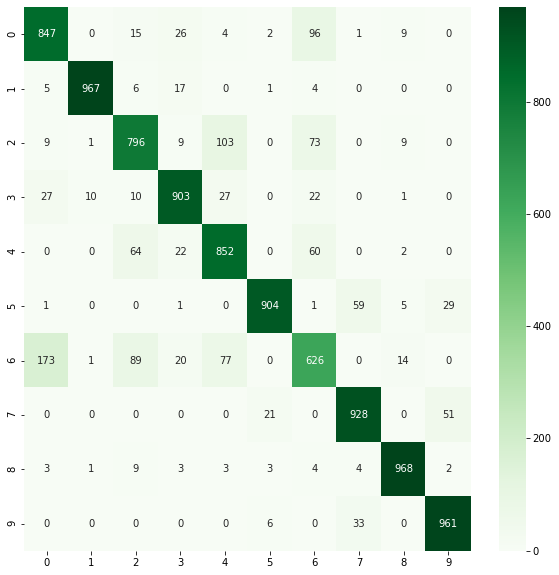

In [112]:
# confusion matrix
mat_vote1_test=confusion_matrix(y_testing_set_dont_touch, y_pred_vote1_test)
confussion_matrix(mat_vote1_test)

In [113]:
# precision score, recall score, f1 score
print("precision_score_vote:",precision_score(y_testing_set_dont_touch, y_pred_vote1_test,average='weighted')) 
print("recall_score_vote:",recall_score(y_testing_set_dont_touch, y_pred_vote1_test,average='weighted'))
print("f1_score_vote:",f1_score(y_testing_set_dont_touch, y_pred_vote1_test,average='weighted'))

precision_score_vote: 0.8746632117321347
recall_score_vote: 0.8752
f1_score_vote: 0.8743540774690602


## The model with the best sucess rate when testing withe PCA 0.9 is Voting classifier with 87.52% secsess.

# PCA 0.8

In [119]:
x_testing_set_dont_touch_reduced2=pca2.transform(x_testing_set_dont_touch)

## KNN2

In [135]:
y_pred_knn2_test=knn2.predict(x_testing_set_dont_touch_reduced2)
accuracy_knn2_test=metrics.accuracy_score(y_testing_set_dont_touch,y_pred_knn2_test)
accuracy_knn2_test

0.8535

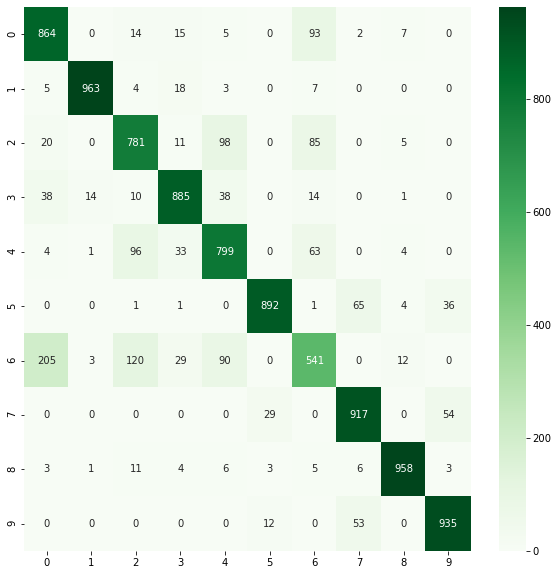

In [136]:
# confusion matrix
mat_knn2_test=confusion_matrix(y_testing_set_dont_touch, y_pred_knn2_test)
confussion_matrix(mat_knn2_test)

In [137]:
# precision score, recall score, f1 score
print("precision_score_vote:",precision_score(y_testing_set_dont_touch, y_pred_knn2_test,average='weighted')) 
print("recall_score_vote:",recall_score(y_testing_set_dont_touch, y_pred_knn2_test,average='weighted'))
print("f1_score_vote:",f1_score(y_testing_set_dont_touch, y_pred_knn2_test,average='weighted'))

precision_score_vote: 0.8527055074936064
recall_score_vote: 0.8535
f1_score_vote: 0.8518633637024101


## XG2

In [125]:
y_pred_xg2_test=XG2.predict(x_testing_set_dont_touch_reduced2)
accuracy_xg2_test=metrics.accuracy_score(y_testing_set_dont_touch,y_pred_xg2_test)
accuracy_xg2_test

0.8504

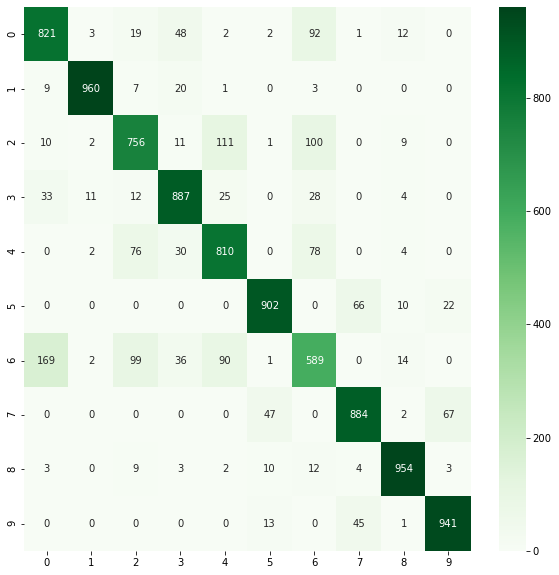

In [127]:
# confusion matrix
mat_xg2_test=confusion_matrix(y_testing_set_dont_touch, y_pred_xg2_test)
confussion_matrix(mat_xg2_test)

In [128]:
# precision score, recall score, f1 score
print("precision_score_vote:",precision_score(y_testing_set_dont_touch, y_pred_xg2_test,average='weighted')) 
print("recall_score_vote:",recall_score(y_testing_set_dont_touch, y_pred_xg2_test,average='weighted'))
print("f1_score_vote:",f1_score(y_testing_set_dont_touch, y_pred_xg2_test,average='weighted'))

precision_score_vote: 0.8490013862359581
recall_score_vote: 0.8504
f1_score_vote: 0.8493795265013243


## RANDOM FOREST2

In [138]:
y_pred_forest2_test=forest2.predict(x_testing_set_dont_touch_reduced2)
accuracy_forest2_test=metrics.accuracy_score(y_testing_set_dont_touch,y_pred_forest2_test)
accuracy_forest2_test

0.8589

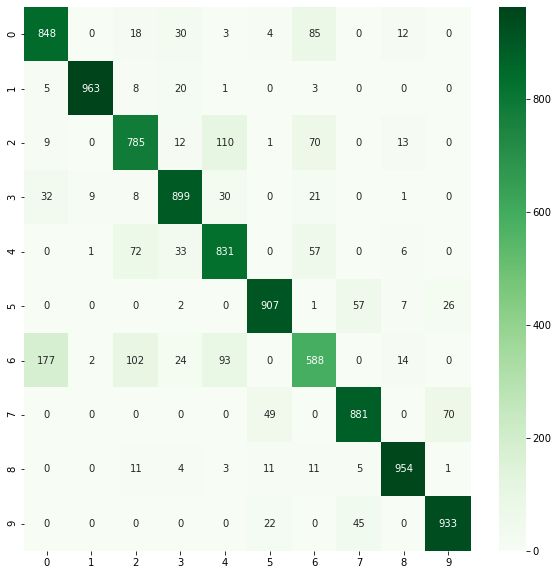

In [139]:
# confusion matrix
mat_forest2_test=confusion_matrix(y_testing_set_dont_touch, y_pred_forest2_test)
confussion_matrix(mat_forest2_test)

In [140]:
# precision score, recall score, f1 score
print("precision_score_vote:",precision_score(y_testing_set_dont_touch, y_pred_forest2_test,average='weighted')) 
print("recall_score_vote:",recall_score(y_testing_set_dont_touch, y_pred_forest2_test,average='weighted'))
print("f1_score_vote:",f1_score(y_testing_set_dont_touch, y_pred_forest2_test,average='weighted'))

precision_score_vote: 0.8575906449337395
recall_score_vote: 0.8589
f1_score_vote: 0.8574856285720142


## Vote2

In [141]:
y_pred_vote2_test=vote2.predict(x_testing_set_dont_touch_reduced2)
accuracy_vote2_test=metrics.accuracy_score(y_testing_set_dont_touch,y_pred_vote2_test)
accuracy_vote2_test

0.8619

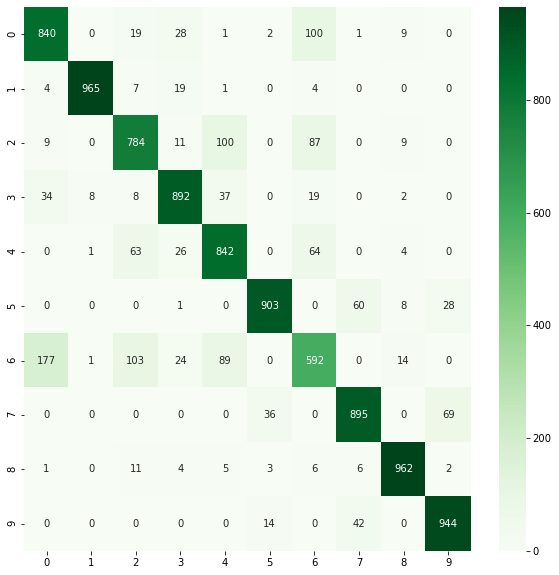

In [142]:
# confusion matrix
mat_vote2_test=confusion_matrix(y_testing_set_dont_touch, y_pred_vote2_test)
confussion_matrix(mat_vote2_test)

In [143]:
# precision score, recall score, f1 score
print("precision_score_vote:",precision_score(y_testing_set_dont_touch, y_pred_vote2_test,average='weighted')) 
print("recall_score_vote:",recall_score(y_testing_set_dont_touch, y_pred_vote2_test,average='weighted'))
print("f1_score_vote:",f1_score(y_testing_set_dont_touch, y_pred_vote2_test,average='weighted'))

precision_score_vote: 0.8609602332691652
recall_score_vote: 0.8619
f1_score_vote: 0.8608441731059913


## The model with the best success rate when testing with PCA 0.8 is Voting classifier with 86.19% success

# PCA 0.7

In [144]:
x_testing_set_dont_touch_reduced3=pca3.transform(x_testing_set_dont_touch)

## KNN3

In [145]:
y_pred_knn3_test=knn3.predict(x_testing_set_dont_touch_reduced3)
accuracy_knn3_test=metrics.accuracy_score(y_testing_set_dont_touch,y_pred_knn3_test)
accuracy_knn3_test

0.8087

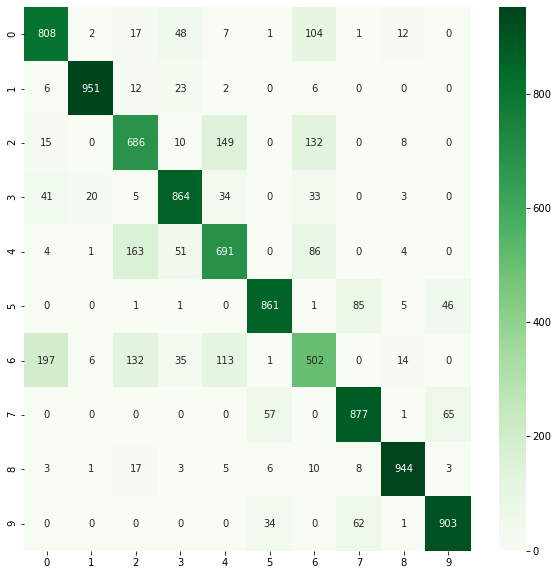

In [146]:
# confusion matrix
mat_knn3_test=confusion_matrix(y_testing_set_dont_touch, y_pred_knn3_test)
confussion_matrix(mat_knn3_test)

In [147]:
# precision score, recall score, f1 score
print("precision_score_vote:",precision_score(y_testing_set_dont_touch, y_pred_knn3_test,average='weighted')) 
print("recall_score_vote:",recall_score(y_testing_set_dont_touch, y_pred_knn3_test,average='weighted'))
print("f1_score_vote:",f1_score(y_testing_set_dont_touch, y_pred_knn3_test,average='weighted'))

precision_score_vote: 0.8070671955167851
recall_score_vote: 0.8087
f1_score_vote: 0.807421986331255


## XG3

In [149]:
y_pred_xg3_test=XG3.predict(x_testing_set_dont_touch_reduced3)
accuracy_xg3_test=metrics.accuracy_score(y_testing_set_dont_touch,y_pred_xg3_test)
accuracy_xg3_test

0.7984

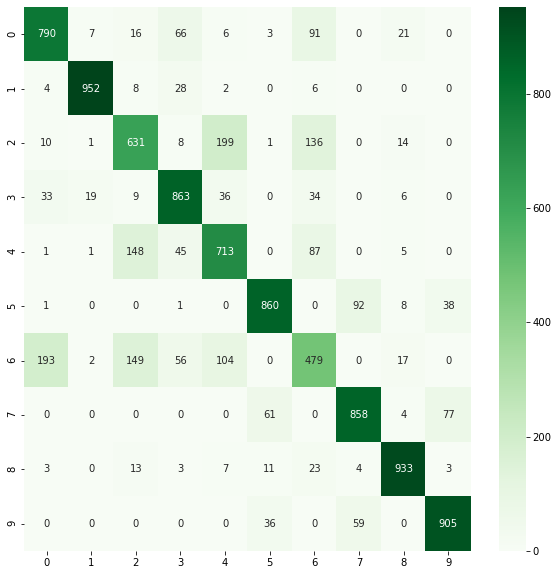

In [150]:
# confusion matrix
mat_xg3_test=confusion_matrix(y_testing_set_dont_touch, y_pred_xg3_test)
confussion_matrix(mat_xg3_test)

In [151]:
# precision score, recall score, f1 score
print("precision_score_vote:",precision_score(y_testing_set_dont_touch, y_pred_xg3_test,average='weighted')) 
print("recall_score_vote:",recall_score(y_testing_set_dont_touch, y_pred_xg3_test,average='weighted'))
print("f1_score_vote:",f1_score(y_testing_set_dont_touch, y_pred_xg3_test,average='weighted'))

precision_score_vote: 0.7956940265596488
recall_score_vote: 0.7984
f1_score_vote: 0.7964902241911602


## RANDOM FOREST3

In [153]:
y_pred_forest3_test=forest3.predict(x_testing_set_dont_touch_reduced3)
accuracy_forest3_test=metrics.accuracy_score(y_testing_set_dont_touch,y_pred_forest3_test)
accuracy_forest3_test

0.8188

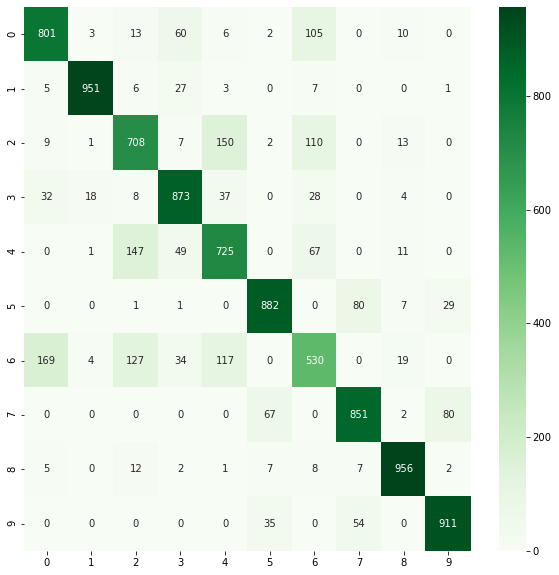

In [154]:
# confusion matrix
mat_forest3_test=confusion_matrix(y_testing_set_dont_touch, y_pred_forest3_test)
confussion_matrix(mat_forest3_test)

In [155]:
# precision score, recall score, f1 score
print("precision_score_vote:",precision_score(y_testing_set_dont_touch, y_pred_forest3_test,average='weighted')) 
print("recall_score_vote:",recall_score(y_testing_set_dont_touch, y_pred_forest3_test,average='weighted'))
print("f1_score_vote:",f1_score(y_testing_set_dont_touch, y_pred_forest3_test,average='weighted'))

precision_score_vote: 0.8166640003794265
recall_score_vote: 0.8188
f1_score_vote: 0.8172444420958436


## Vote3

In [170]:
y_pred_vote3_test=vote3.predict(x_testing_set_dont_touch_reduced3)
accuracy_vote3_test=metrics.accuracy_score(y_testing_set_dont_touch,y_pred_vote3_test)
accuracy_vote3_test

0.8226

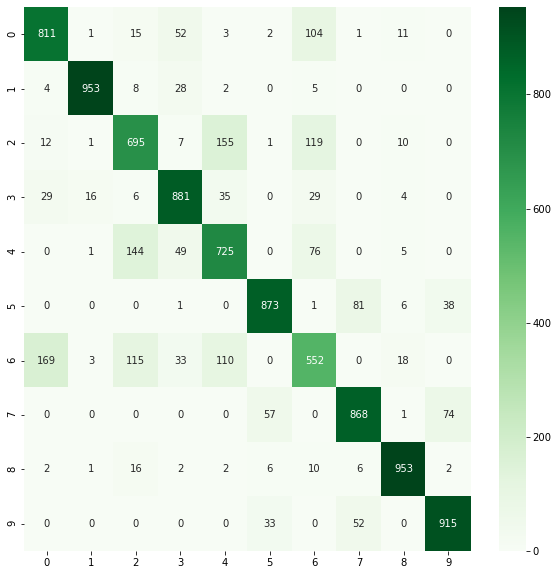

In [171]:
# confusion matrix
mat_vote3_test=confusion_matrix(y_testing_set_dont_touch, y_pred_vote3_test)
confussion_matrix(mat_vote3_test)

In [172]:
# precision score, recall score, f1 score
print("precision_score_vote:",precision_score(y_testing_set_dont_touch, y_pred_vote3_test,average='weighted')) 
print("recall_score_vote:",recall_score(y_testing_set_dont_touch, y_pred_vote3_test,average='weighted'))
print("f1_score_vote:",f1_score(y_testing_set_dont_touch, y_pred_vote3_test,average='weighted'))

precision_score_vote: 0.8210965371270827
recall_score_vote: 0.8226
f1_score_vote: 0.8215299963761928


## The model with the best success rate when testing with PCA 0.7 is Voting classifier with 82.26% success.

# Final Results

## The best result with PCA 0.9 = 84 features is voting classifier with 87.52% success.

## The best result with PCA 0.8 = 24 features is voting classifier with 86.19% success.

## The best result with PCA 0.7 = 9 features is voting classifier with 82.26% success.

# The best model I think is the Voting classifier with PCA 0.7 because it uses only 9 features and got over 80% correct.

### Throughout the whole notebook the labels that got confused the most are the shirt, t-shirt, pullover and coat, because they are the most similar.
### You would think that the shoes, sandeles and boots would be confused a lot, but they wern't confused that much because each had somthing very different about it, where all types of tops didn't have somthing unique.